# 📊 Estudo de Turnover de Estagiários com Machine Learning

## 🌳 Algoritmo Decision Tree - Classificação

Autor: Ronaldo Muinhos
Data: 15/08/2025
---

Este estudo tem como objetivo **analisar e prever o turnover de estagiários** utilizando técnicas de *Machine Learning*.  
O modelo escolhido para a classificação foi o **Decision Tree**, devido à sua robustez, capacidade de lidar com variáveis categóricas e numéricas, e boa performance em conjuntos de dados complexos.

**Objetivos principais:**
- Identificar padrões que levam ao desligamento de estagiários.
- Criar um modelo preditivo com alta acurácia.
- Apoiar a tomada de decisão no RH.

---

**📌 Etapas do estudo:**
1. **Coleta e limpeza dos dados**
2. **Análise exploratória**
3. **Treinamento do modelo Decision Tree**
4. **Avaliação da performance**
5. **Interpretação dos resultados**

In [2]:
import pandas as pd

feature_data_pd = pd.read_csv("estagiarios_churn_realistas_15k.csv")
feature_data_pd = feature_data_pd.drop(columns=['id'])

#Converte todas as colunas do DataFrame para o tipo "double"
for column in feature_data_pd.columns:
    feature_data_pd[column] = feature_data_pd[column].astype("double")

#Exiba o DataFrame Pandas
display(feature_data_pd)

,idade,curso,semestre,turno,experiencia_previa,distancia_km,tipo_instituicao,perfil_comportamental,feedback_entrevista,nota_prova_tecnica,churn
0,24.000000,4.0,7.000000,1.0,0.0,20.100000,1.0,0.0,2.0,8.300000,1.0
1,24.000000,1.0,3.000000,0.0,0.0,19.300000,0.0,2.0,2.0,5.300000,1.0
2,18.000000,0.0,4.000000,0.0,0.0,25.000000,1.0,0.0,1.0,6.300000,1.0
3,20.000000,1.0,2.000000,1.0,0.0,20.100000,0.0,1.0,2.0,6.500000,1.0
4,25.000000,0.0,6.000000,0.0,0.0,23.500000,0.0,2.0,1.0,5.300000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,23.906498,1.0,6.975797,0.0,1.0,22.470054,1.0,3.0,3.0,5.606258,0.0
14996,22.922926,4.0,1.880724,2.0,0.0,0.855753,0.0,2.0,3.0,4.525606,0.0
14997,19.945100,3.0,8.000000,1.0,1.0,7.034618,1.0,2.0,3.0,5.706818,0.0
14998,22.061329,2.0,1.877261,2.0,0.0,20.743385,0.0,1.0,0.0,5.011621,0.0


In [12]:
from sklearn.model_selection import train_test_split

print(f"Número de Registros no DataFrame: {feature_data_pd.shape[0]}")

#Separa o variável alvo em um seu próprio DataFrame
target_col = "churn"
X_all = feature_data_pd.drop(labels=target_col, axis=1)
y_all = feature_data_pd[target_col]

#Vamos dividir os DataFrames em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.8, random_state=50)
print(f"Registros no Dataset de Treino: {X_train.shape[0]}")
print(f"Registros no Dataset de Teste: {X_test.shape[0]}")

Número de Registros no DataFrame: 15000
Registros no Dataset de Treino: 12000
Registros no Dataset de Teste: 3000


### Treinamento do Modelo de Classificação

In [33]:
from math import sqrt
import mlflow.sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mlflow.set_experiment("Decision Tree Classifier - Churn Estagiários")
with mlflow.start_run():
    
    #Habilitar Autologging do MLFlow
    mlflow.sklearn.autolog(log_input_examples=True)
    
    #Executar o fit no modelo
    dtc = DecisionTreeClassifier()
    dtc_model = dtc.fit(X_train, y_train)
    
    #Testar e avaliar o modelo
    y_predicted = dtc_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_predicted)
    test_prec = precision_score(y_test, y_predicted)
    test_rec = recall_score(y_test, y_predicted)
    test_f1 = f1_score(y_test, y_predicted)
    
    #Exibir os Resultados das métricas
    print(f"Test Evaluation Summary")
    print(f"Accuracy {test_acc}")
    print(f"Precision {test_prec}")
    print(f"Recall {test_rec}")
    print(f"F1 {test_f1}")

    #Registra a versão do modelo
    mlflow.sklearn.log_model(sk_model=dtc_model,
                             name="sklearn-model",
                             input_example=X_train,
                             registered_model_name="sklearn-dct-model",
        )

    #informações da execução
    print("Modelo: ", mlflow.active_run().info.run_id)   

mlflow.end_run()

Test Evaluation Summary
Accuracy 0.9986666666666667
Precision 0.9991659716430359
Recall 0.9975020815986678
F1 0.9983333333333333
Modelo:  57527d8261b740caa2ae1fa8033f8b82


Successfully registered model 'sklearn-dct-model'.
Created version '1' of model 'sklearn-dct-model'.


## Exibir a Matrix de Confusão

<Figure size 800x600 with 0 Axes>

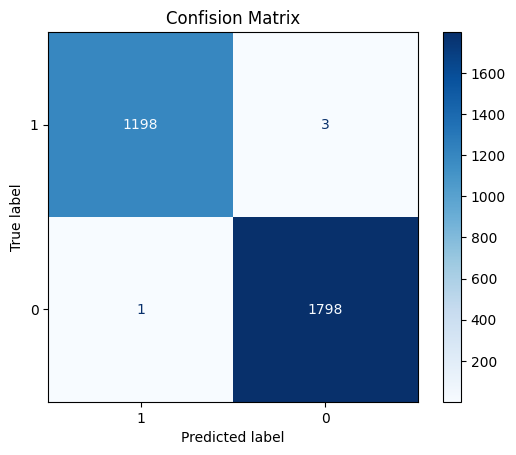

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Calculando a Matriz de Confusão
cm = confusion_matrix(y_test, y_predicted, labels=[1, 0])

#Plotando a Matriz
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confision Matrix")
plt.show()

## Exibindo os resultados do Modelo

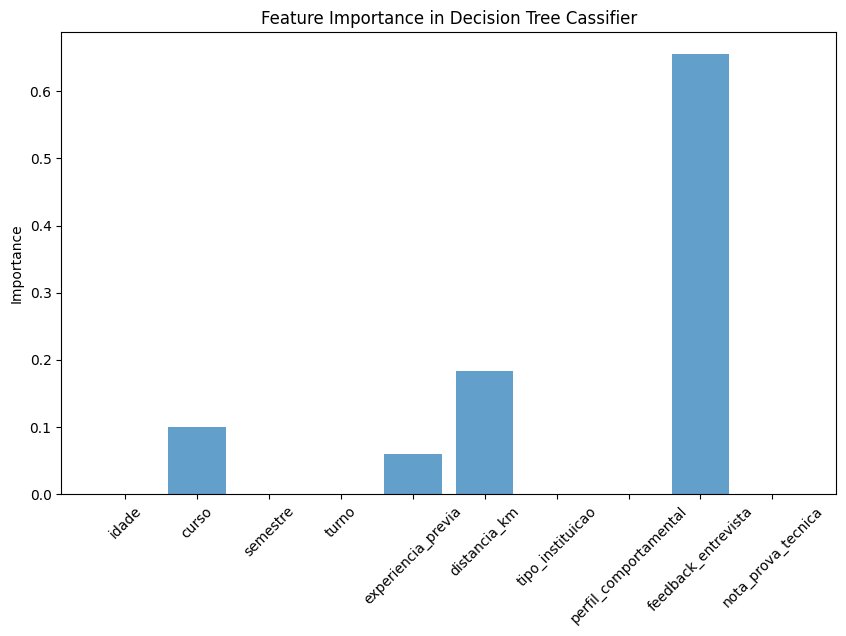

In [25]:
import numpy as np

#Coletando a importância de cada features
feature_importance = dtc_model.feature_importances_
feature_names = X_train.columns.to_list()

#Exibindo o gráfico de importância de features
plt.figure(figsize=(10, 6))
y_pos = np.arange(len(feature_names))
plt.bar(y_pos, feature_importance, align='center', alpha=0.7)
plt.xticks(y_pos, feature_names, rotation=45)
plt.ylabel("Importance")
plt.title("Feature Importance in Decision Tree Cassifier")

plt.show()

In [26]:
#Examindando a estrutura da árvore de decisão
print(f"O modelo DecisonTreeClassifier treinado tem {dtc_model.tree_.node_count} nós e {dtc_model.tree_.max_depth} níveis de profundidade.")

O modelo DecisonTreeClassifier treinado tem 61 nós e 10 níveis de profundidade.


In [29]:
#Representação textual do modelo
from sklearn.tree import export_text

text_representation = export_text(dtc_model, feature_names=feature_names)
print(text_representation)

|--- feedback_entrevista <= 0.50
|   |--- curso <= 1.50
|   |   |--- experiencia_previa <= 0.50
|   |   |   |--- curso <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- curso >  0.50
|   |   |   |   |--- distancia_km <= 8.05
|   |   |   |   |   |--- distancia_km <= 7.85
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- distancia_km >  7.85
|   |   |   |   |   |   |--- distancia_km <= 7.93
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- distancia_km >  7.93
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- distancia_km >  8.05
|   |   |   |   |   |--- class: 1.0
|   |   |--- experiencia_previa >  0.50
|   |   |   |--- class: 0.0
|   |--- curso >  1.50
|   |   |--- class: 0.0
|--- feedback_entrevista >  0.50
|   |--- feedback_entrevista <= 2.50
|   |   |--- distancia_km <= 15.00
|   |   |   |--- feedback_entrevista <= 1.50
|   |   |   |   |--- curso <= 1.50
|   |   |   |   |   |--- curso <= 0.50
|   |   |   |   |   |   |--- cl

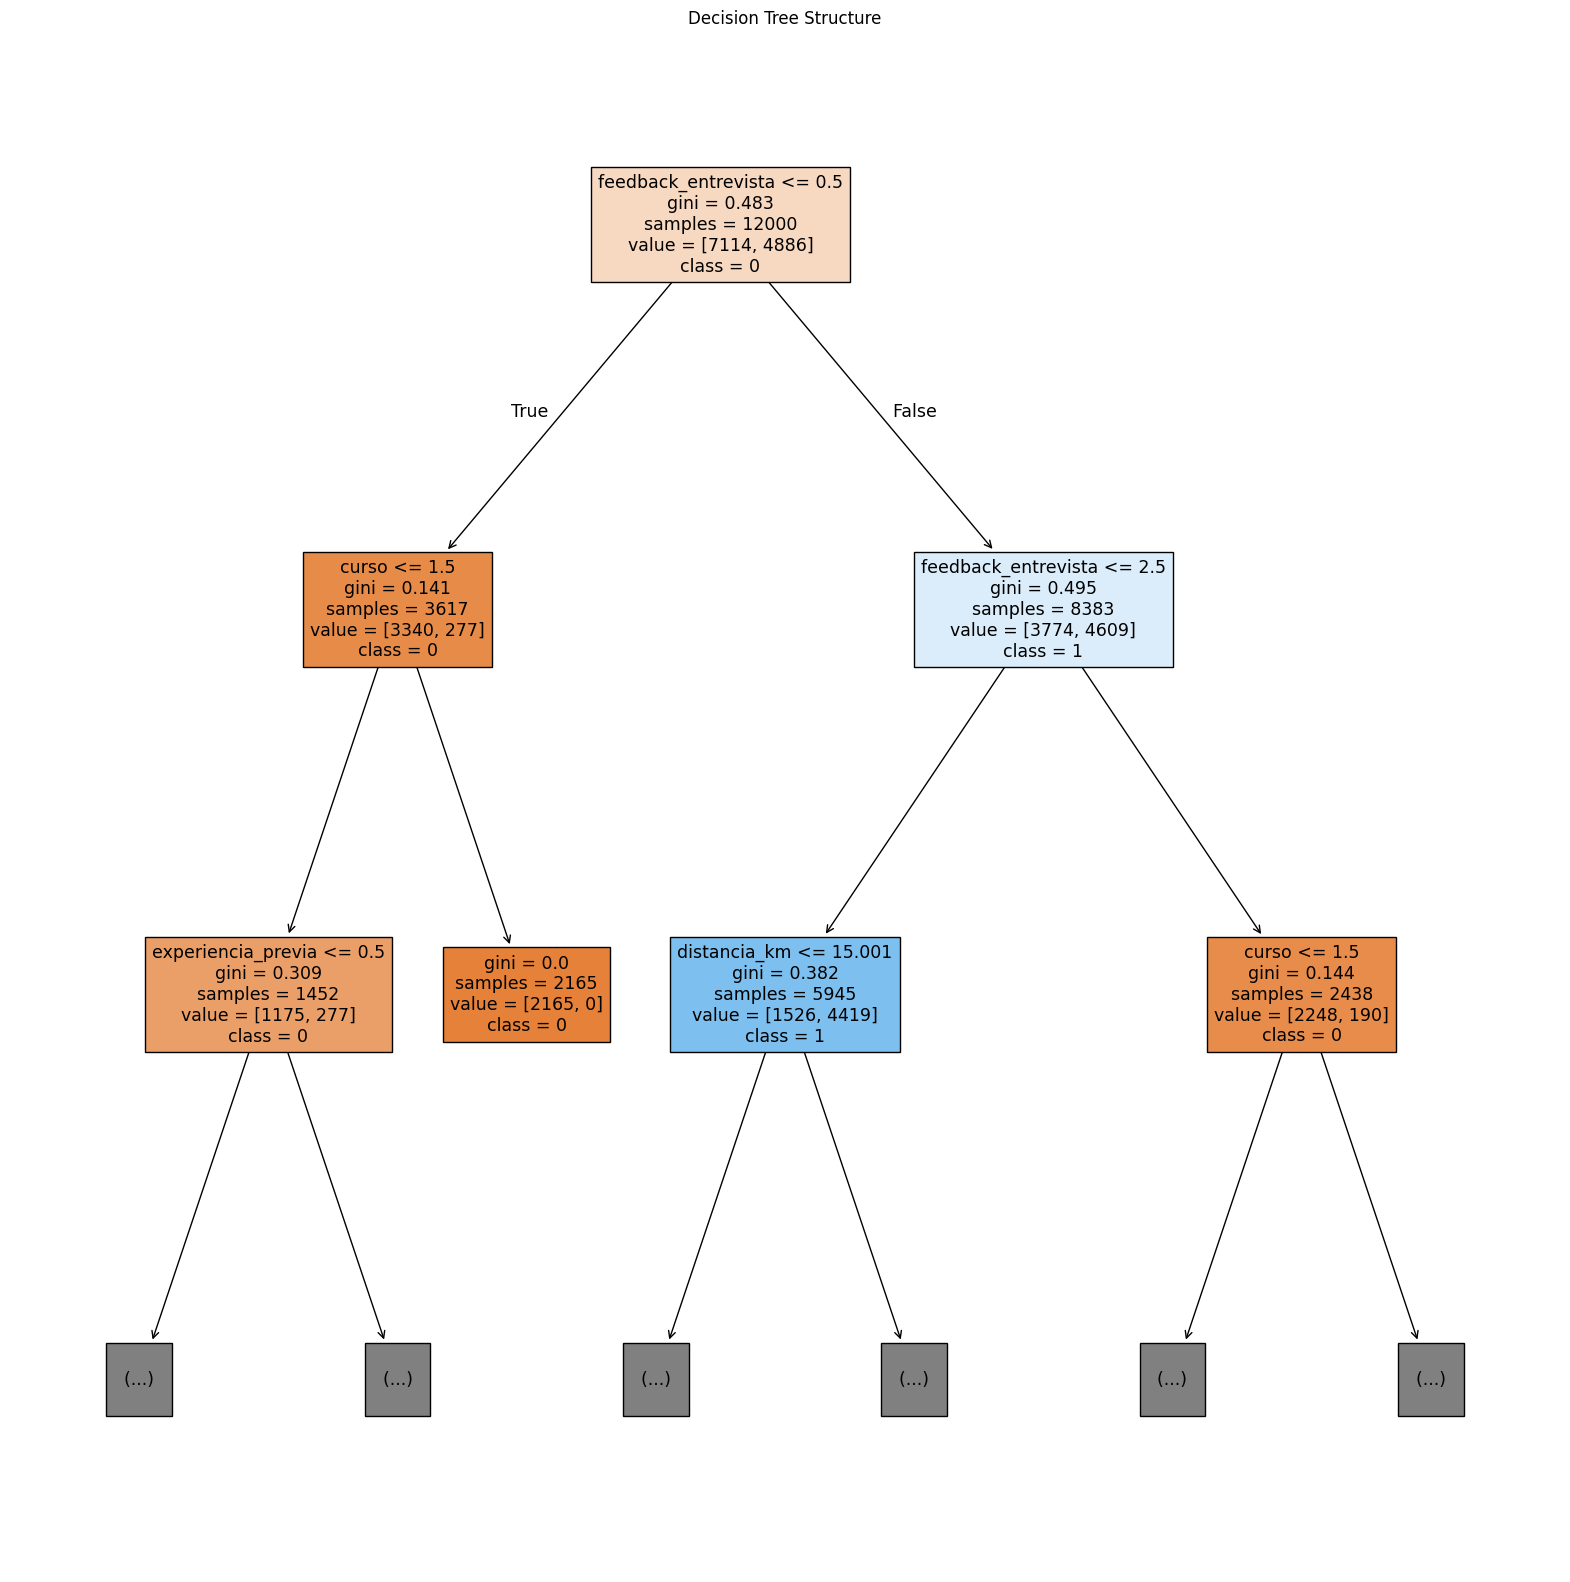

In [30]:
#Exibindo a representação gráfica da árvore de decisão
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(dtc_model,
          feature_names=feature_names,
          max_depth=2,
          class_names=['0', '1'],
          filled=True)
plt.title("Decision Tree Structure")
plt.show()